# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

#create lists that we will use to hold the response info
temp=[]
humidity=[]
clouds=[]
wind=[]
cityname=[]
city_id=[]
lat_api=[]
lon_api=[]

#iterate for multiple cities
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    try:
        weather_json=requests.get(query_url).json()
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        cityname.append(weather_json['name'])
        city_id.append(weather_json['id'])
        lat_api.append(weather_json["coord"]["lat"])
        lon_api.append(weather_json["coord"]["lon"])
    except:
        print(f'no data for {city}')
    
        
print(cityname,city_id)

no data for taolanaro
no data for sentyabrskiy
no data for illoqqortoormiut
no data for yefimovskiy
no data for phnum penh
no data for falealupo
no data for qibili
no data for palabuhanratu
no data for toliary
no data for belushya guba
no data for el faiyum
no data for nizhneyansk
no data for mochitlan
no data for grand river south east
no data for barentsburg
no data for bolungarvik
no data for marcona
no data for kamenskoye
no data for karkaralinsk
no data for louisbourg
no data for tumannyy
no data for samalaeulu
no data for tabiauea
no data for tsihombe
no data for vaitupu
no data for umzimvubu
no data for labutta
no data for matameye
no data for leonidion
no data for halalo
no data for paradwip
no data for yirol
no data for amderma
no data for tidore
no data for hihifo
no data for samusu
no data for saleaula
no data for sinkat
no data for zachagansk
no data for mys shmidta
no data for ayotzingo
no data for meyungs
no data for karpuninskiy
no data for phan rang
no data for karaul
n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_dict={"id":city_id,
              "city":cityname,
                   "lat":lat_api,
                   "lon":lon_api,
             "temp (F)":temp,
             "humidity (%)":humidity,
             "cloudiness (%)":clouds,
             "wind speed (mph)":wind}

In [6]:
city_weather_df=pd.DataFrame(city_weather_dict)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_data=city_weather_df.drop(city_weather_df[city_weather_df["humidity (%)"]>100].index, inplace= False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is designed to show if there is a relationship between a city's latitude (how far or close to the equator it is), and temperature at the time these measurements were taken.  Predictably, temperature rises the closer you are to the equator.

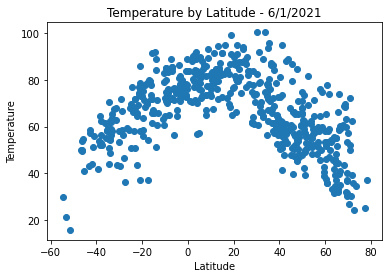

In [8]:
plt.title('Temperature by Latitude - 6/1/2021')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["temp (F)"])
plt.show
plt.savefig('lat_v_temp.png')

## Latitude vs. Humidity Plot

This plot is designed to show if there is a relationship between a city's latitude (how far or close to the equator it is), and % humidity at the time these measurements were taken.  A bit counterintuitively, the % humidity appears to be less uniform and more spreadout the closer you get ot the equator.

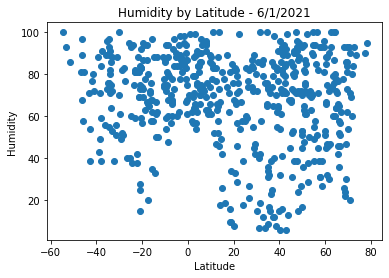

In [9]:
plt.title('Humidity by Latitude - 6/1/2021')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["humidity (%)"])
plt.show
plt.savefig('lat_v_humid.png')

## Latitude vs. Cloudiness Plot

This plot is designed to show if there is a relationship between a city's latitude (how far or close to the equator it is), and % cloud cover at the time these measurements were taken.  There appears to be no real relationship between latitude and cloud cover in this plot other than skies appear to mostly be clear or completely cloudy.

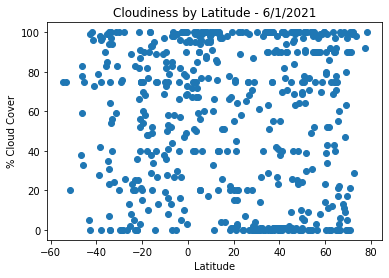

In [10]:
plt.title('Cloudiness by Latitude - 6/1/2021')
plt.ylabel("% Cloud Cover")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["cloudiness (%)"])
plt.show
plt.savefig('lat_v_clouds.png')

## Latitude vs. Wind Speed Plot

This plot is designed to show if there is a relationship between a city's latitude (how far or close to the equator it is), and wind speed at the time these measurements were taken.  The only visual observation is that windspeed seems to be fairly uniformly low, but the outliers seem to get more powerful the further North that you travel.

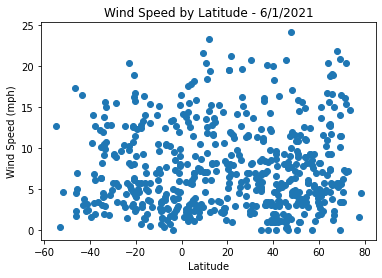

In [11]:
plt.title('Wind Speed by Latitude - 6/1/2021')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(clean_city_data["lat"],clean_city_data["wind speed (mph)"])
plt.show
plt.savefig('lat_v_wind.png')

## Linear Regression

In [12]:
#calculate all regression variables 
clean_city_data_north=clean_city_data[clean_city_data["lat"]>=0]
clean_city_data_south=clean_city_data[clean_city_data["lat"]<0]

x_values_north_lat = clean_city_data_north["lat"]
x_values_south_lat = clean_city_data_south["lat"]

y_values_north_temp = clean_city_data_north["temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_lat, y_values_north_temp)
regress_north_temp = x_values_north_lat * slope + intercept

y_values_south_temp = clean_city_data_south["temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_lat, y_values_south_temp)
regress_south_temp = x_values_south_lat * slope + intercept

y_values_north_humid = clean_city_data_north["humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_lat, y_values_north_humid)
regress_north_humid = x_values_north_lat * slope + intercept

y_values_south_humid = clean_city_data_south["humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_lat, y_values_south_humid)
regress_south_humid = x_values_south_lat * slope + intercept

y_values_north_clouds = clean_city_data_north["cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_lat, y_values_north_clouds)
regress_north_clouds = x_values_north_lat * slope + intercept

y_values_south_clouds = clean_city_data_south["cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_lat, y_values_south_clouds)
regress_south_clouds = x_values_south_lat * slope + intercept

y_values_north_wind = clean_city_data_north["wind speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_lat, y_values_north_wind)
regress_north_wind = x_values_north_lat * slope + intercept

y_values_south_wind = clean_city_data_south["wind speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_lat, y_values_south_wind)
regress_south_wind = x_values_south_lat * slope + intercept

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression appears to corroborate the intuitive theory that temperature rises as you go closer to the equator, and falls as you move away from it.

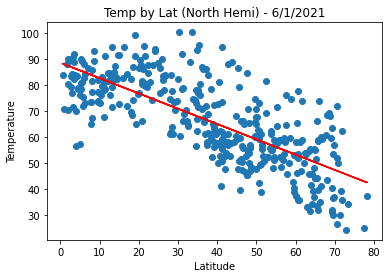

In [13]:
plt.title('Temp by Lat (North Hemi) - 6/1/2021')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_north["lat"],clean_city_data_north["temp (F)"])
plt.plot(x_values_north_lat,regress_north_temp,"r-")
plt.show
plt.savefig('lat_v_temp_north_reg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression appears to corroborate the intuitive theory that temperature rises as you go closer to the equator, and falls as you move away from it.

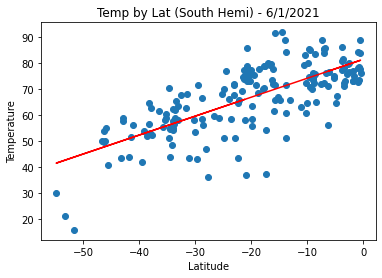

In [14]:
plt.title('Temp by Lat (South Hemi) - 6/1/2021')
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_south["lat"],clean_city_data_south["temp (F)"])
plt.plot(x_values_south_lat,regress_south_temp,"r-")
plt.show
plt.savefig('lat_v_temp_south_reg.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression appears to show that humidity drops slightly on average as you move away from the equator, looks to be fairly constant.

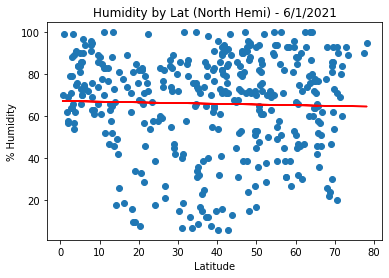

In [15]:
plt.title('Humidity by Lat (North Hemi) - 6/1/2021')
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_north["lat"],clean_city_data_north["humidity (%)"])
plt.plot(x_values_north_lat,regress_north_humid,"r-")
plt.show
plt.savefig('lat_v_humid_north_reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression appears to show that humidity drops slightly on average as you move away from the equator, looks to be fairly constant.

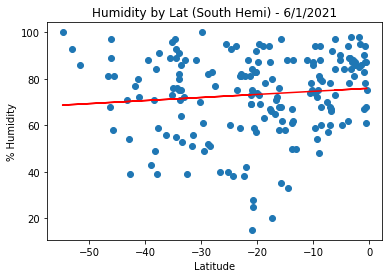

In [16]:
plt.title('Humidity by Lat (South Hemi) - 6/1/2021')
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_south["lat"],clean_city_data_south["humidity (%)"])
plt.plot(x_values_south_lat,regress_south_humid,"r-")
plt.show
plt.savefig('lat_v_humid_south_reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

This regression shows that cloud cover does indeed decrease slightly as you move away from the equator, but overall is distributed pretty evenly between full cover and no clouds.

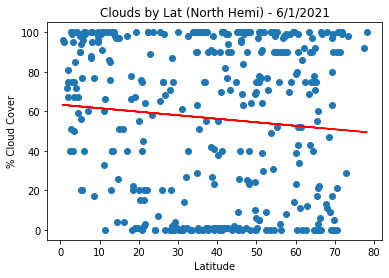

In [17]:
plt.title('Clouds by Lat (North Hemi) - 6/1/2021')
plt.ylabel("% Cloud Cover")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_north["lat"],clean_city_data_north["cloudiness (%)"])
plt.plot(x_values_north_lat,regress_north_clouds,"r-")
plt.show
plt.savefig('lat_v_clouds_north_reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Similar to the North, this regression shows that cloud cover does indeed decrease slightly as you move away from the equator, but overall is distributed pretty evenly between full cover and no clouds.

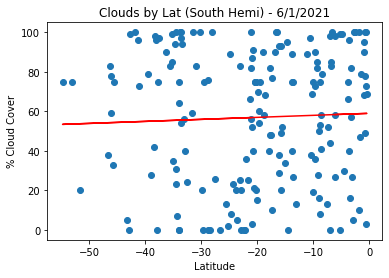

In [18]:
plt.title('Clouds by Lat (South Hemi) - 6/1/2021')
plt.ylabel("% Cloud Cover")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_south["lat"],clean_city_data_south["cloudiness (%)"])
plt.plot(x_values_south_lat,regress_south_clouds,"r-")
plt.show
plt.savefig('lat_v_clouds_south_reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

This regression shows that there is a small uptick in wind speed as a go further north, with the highest outliers being found closer to the Arctic.

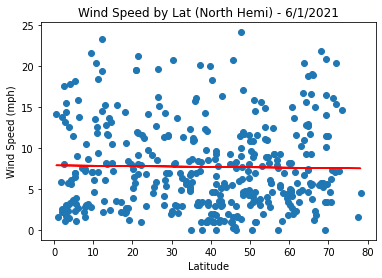

In [19]:
plt.title('Wind Speed by Lat (North Hemi) - 6/1/2021')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_north["lat"],clean_city_data_north["wind speed (mph)"])
plt.plot(x_values_north_lat,regress_north_wind,"r-")
plt.show
plt.savefig('lat_v_wind_north_reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

This regression confirms that there is a small uptick in wind speed as you move away from the equator, but the outliers in the south are lower than those int he north.

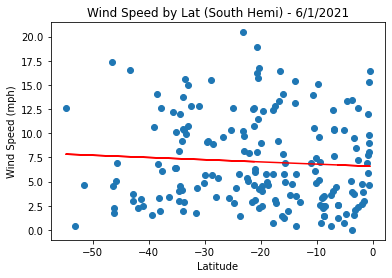

In [20]:
plt.title('Wind Speed by Lat (South Hemi) - 6/1/2021')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(clean_city_data_south["lat"],clean_city_data_south["wind speed (mph)"])
plt.plot(x_values_south_lat,regress_south_wind,"r-")
plt.show
plt.savefig('lat_v_wind_south_reg.png')

In [21]:
clean_city_data.to_csv(r'city_weather_data.csv', index = False)